1. Мини-EDA анализа данных
Загрузим файлы data/clients.csv и data/bank_transactions.csv и соберём базовую статистику: количество записей, уникальных значений, распределение категорий, максимальное повторение и соотношение типов транзакций.

Описание:

Загружаем файлы и выводим количество строк, уникальных значений, типы данных и первые строки.
Анализируем распределение transaction_type (включая p2p и withdrawal).
Проверяем максимальное повторение по ключевым полям (client_id, merchant, ip_network), чтобы понять, какие связи доминируют.

In [4]:
import pandas as pd

# Загружаем данные
clients = pd.read_csv('data/clients.csv')
transactions = pd.read_csv('data/bank_transactions.csv')

# Базовая статистика по clients
print("=== Статистика по clients.csv ===")
print(f"Количество строк: {len(clients)}")
print(f"Количество уникальных клиентов (client_id): {clients['client_id'].nunique()}")
print("\nСтолбцы и их типы:")
print(clients.dtypes)
print("\nПервые 5 строк:")
display(clients.head())
print("\nУникальные значения по столбцам:")
for column in clients.columns:
    print(f"{column}: {clients[column].nunique()} уникальных значений")

# Базовая статистика по transactions
print("\n=== Статистика по bank_transactions.csv ===")
print(f"Количество строк: {len(transactions)}")
print(f"Количество уникальных транзакций (transaction_id): {transactions['transaction_id'].nunique()}")
print("\nСтолбцы и их типы:")
print(transactions.dtypes)
print("\nПервые 5 строк:")
display(transactions.head())
print("\nУникальные значения по столбцам:")
for column in transactions.columns:
    print(f"{column}: {transactions[column].nunique()} уникальных значений")

# Распределение типов транзакций
print("\n=== Распределение типов транзакций ===")
transaction_type_counts = transactions['transaction_type'].value_counts()
print(transaction_type_counts)
print(f"Доля P2P: {transaction_type_counts.get('p2p', 0) / len(transactions) * 100:.2f}%")
print(f"Доля withdrawal: {transaction_type_counts.get('withdrawal', 0) / len(transactions) * 100:.2f}%")
print(f"Доля deposit: {transaction_type_counts.get('deposit', 0) / len(transactions) * 100:.2f}%")

# Максимальное повторение по ключевым полям
print("\n=== Максимальное повторение ===")
print(f"Максимальное повторение client_id: {transactions['client_id'].value_counts().max()}")
print(f"Максимальное повторение merchant: {transactions['merchant'].value_counts().dropna().max()}")
print(f"Максимальное повторение ip_address: {transactions['ip_address'].value_counts().dropna().max()}")

=== Статистика по clients.csv ===
Количество строк: 1200
Количество уникальных клиентов (client_id): 1200

Столбцы и их типы:
client_id                object
first_name               object
last_name                object
email                    object
passport_id              object
registration_date        object
status                   object
age                       int64
gender                   object
income_level             object
last_active_date         object
transaction_frequency    object
dtype: object

Первые 5 строк:


,client_id,first_name,last_name,email,passport_id,registration_date,status,age,gender,income_level,last_active_date,transaction_frequency
0,client_1,Michael,Johnson,client1@ex.com,AB000001123,2024-08-15,active,28,male,medium,2025-04-10,medium
1,client_2,Sofia,Garcia,client2@ex.com,AB000002123,2023-03-22,active,24,female,low,2025-03-28,high
2,client_3,Alexander,Petrov,client3@ex.com,AB000003123,2024-02-10,active,35,male,medium,2025-04-18,medium
3,client_4,Emma,Williams,client4@ex.com,AB000004123,2023-07-05,active,22,female,low,2025-03-15,medium
4,client_5,Wei,Zhang,client5@ex.com,AB000005123,2024-01-18,active,42,male,high,2025-04-01,high



Уникальные значения по столбцам:
client_id: 1200 уникальных значений
first_name: 146 уникальных значений
last_name: 307 уникальных значений
email: 1200 уникальных значений
passport_id: 1200 уникальных значений
registration_date: 247 уникальных значений
status: 2 уникальных значений
age: 24 уникальных значений
gender: 2 уникальных значений
income_level: 3 уникальных значений
last_active_date: 29 уникальных значений
transaction_frequency: 3 уникальных значений

=== Статистика по bank_transactions.csv ===
Количество строк: 4652
Количество уникальных транзакций (transaction_id): 4652

Столбцы и их типы:
id                       int64
transaction_id          object
client_id               object
datetime                object
amount                 float64
currency                object
merchant                object
transaction_type        object
ip_address              object
category                object
country_code            object
region                  object
device_type         

,id,transaction_id,client_id,datetime,amount,currency,merchant,transaction_type,ip_address,category,country_code,region,device_type,session_id,channel,recipient_id,transaction_purpose
0,1,0ece3492-67f2-43cb-886e-5f99360439fa,client_5,2025-04-12 15:32:17,125000.45,CNY,NaN,p2p,118.178.92.154,p2p,CN,Shanghai,smartphone,987e6543-e21b-12d3-a789-426614174000,mobile_app,client_27,debt
1,2,eaef9e16-5429-44aa-bb06-f0f2834ded3a,client_14,2025-04-19 18:45:23,85670.89,EUR,NaN,p2p,89.157.231.45,p2p,FR,Paris,smartphone,987e6543-e21b-12d3-a789-426614174001,mobile_app,client_33,debt
2,3,ff9ae270-0906-420a-9a3c-ec4856e1cc2f,client_27,2025-03-08 10:15:42,98500.32,USD,NaN,p2p,72.14.192.178,p2p,US,New York,smartphone,987e6543-e21b-12d3-a789-426614174002,mobile_app,client_5,debt
3,4,51854b88-558d-40fd-9b60-6e4c101c9964,client_33,2025-04-26 14:22:36,75800.75,USD,NaN,p2p,72.14.192.45,p2p,US,Los Angeles,tablet,987e6543-e21b-12d3-a789-426614174003,mobile_app,client_14,debt
4,5,9390ebae-7d5a-4216-ad68-c7b676852e5d,client_41,2025-03-15 16:37:51,215000.23,USD,NaN,p2p,72.14.192.89,p2p,US,Chicago,smartphone,987e6543-e21b-12d3-a789-426614174004,mobile_app,client_59,debt



Уникальные значения по столбцам:
id: 4652 уникальных значений
transaction_id: 4652 уникальных значений
client_id: 1139 уникальных значений
datetime: 2501 уникальных значений
amount: 2023 уникальных значений
currency: 4 уникальных значений
merchant: 13 уникальных значений
transaction_type: 3 уникальных значений
ip_address: 1066 уникальных значений
category: 6 уникальных значений
country_code: 5 уникальных значений
region: 11 уникальных значений
device_type: 3 уникальных значений
session_id: 2893 уникальных значений
channel: 3 уникальных значений
recipient_id: 862 уникальных значений
transaction_purpose: 3 уникальных значений

=== Распределение типов транзакций ===
transaction_type
p2p           1774
deposit       1698
withdrawal    1180
Name: count, dtype: int64
Доля P2P: 38.13%
Доля withdrawal: 25.37%
Доля deposit: 36.50%

=== Максимальное повторение ===
Максимальное повторение client_id: 79
Максимальное повторение merchant: 290
Максимальное повторение ip_address: 110


Ячейка 2: Подробный анализ связей
Проверим, как часто клиенты пересекаются по различным полям, чтобы понять потенциальные рёбра.

Описание:

Проверяем распределение клиентов по мерчантам, чтобы выявить крупных игроков.
Анализируем P2P и withdrawal, включая уникальные recipient_id_hash и client_id.
Проверяем, насколько session_id может генерировать рёбра.


In [5]:
# Анализ пересечений по мерчантам
merchant_pairs = transactions[transactions['merchant'].notna()].groupby('merchant')['client_id'].nunique().reset_index(name='client_count')
print("\n=== Количество клиентов по мерчантам ===")
print(merchant_pairs.sort_values('client_count', ascending=False).head(10))

# Анализ P2P и withdrawal
p2p_data = transactions[transactions['transaction_type'] == 'p2p']
withdrawal_data = transactions[transactions['transaction_type'] == 'withdrawal']
print(f"\nКоличество P2P-транзакций: {len(p2p_data)}")
print(f"Количество withdrawal-транзакций: {len(withdrawal_data)}")
print(f"Уникальных recipient_id в P2P: {p2p_data['recipient_id'].nunique()}")
print(f"Уникальных client_id в withdrawal: {withdrawal_data['client_id'].nunique()}")

# Анализ session_id
session_counts = transactions.groupby('session_id')['client_id'].nunique().reset_index(name='client_count')
session_multiple = session_counts[session_counts['client_count'] > 1]
print(f"\nКоличество session_id, используемых несколькими клиентами: {len(session_multiple)}")
print("Топ-5 session_id по количеству клиентов:")
print(session_multiple.sort_values('client_count', ascending=False).head())

# Анализ регионов и стран
print(f"\nУникальных регионов: {transactions['region'].nunique()}")
print(f"Уникальных стран: {transactions['country_code'].nunique()}")


=== Количество клиентов по мерчантам ===
       merchant  client_count
2        Amazon           154
9       Walmart           153
1        Alipay           140
8          Uber           136
12      Zalando           134
4     Carrefour           129
5          Ozon           128
6          Sber            99
10   WeChat Pay            78
11  Wildberries            70

Количество P2P-транзакций: 1774
Количество withdrawal-транзакций: 1180
Уникальных recipient_id в P2P: 862
Уникальных client_id в withdrawal: 412

Количество session_id, используемых несколькими клиентами: 146
Топ-5 session_id по количеству клиентов:
                                session_id  client_count
2771  e8f9a0b1-c2d3-e4f5-a6b7-c8d9e0f1a2b3            36
2760  e4f5a6b7-c8d9-e0f1-a2b3-c4d5e6f7a8b9            35
2656  a0b1c2d3-e4f5-a6b7-c8d9-e0f1a2b3c4d5            35
2718  c6d7e8f9-a0b1-c2d3-e4f5-a6b7c8d9e0f1            35
2712  c2d3e4f5-a6b7-c8d9-e0f1-a2b3c4d5e6f7            35

Уникальных регионов: 11
Уникальных

Описание:

Строим граф с нуля на основе bank_transactions.csv.
Добавляем рёбра по мерчантам (с фильтром до 100 клиентов), P2P и session_id.
Используем Label Propagation для кластеризации.

In [8]:
import networkx as nx
import pandas as pd
from datetime import timedelta

# Загружаем данные
transactions = pd.read_csv('data/bank_transactions.csv')
transactions['datetime'] = pd.to_datetime(transactions['datetime'])

# Создаём граф
G = nx.Graph()

# Добавляем узлы
clients_set = set(transactions['client_id'])
for client in clients_set:
    G.add_node(client)

# Создаём рёбра
edges = []

# Рёбра по общим мерчантам (только соседние по времени в пределах 1 дня)
merchant_groups = transactions[transactions['merchant'].notna()].sort_values('datetime')
for merchant, group in merchant_groups.groupby('merchant'):
    if len(group) <= 100:  # Фильтр по количеству клиентов
        for i in range(len(group) - 1):
            curr_client = group.iloc[i]['client_id']
            next_client = group.iloc[i + 1]['client_id']
            curr_time = group.iloc[i]['datetime']
            next_time = group.iloc[i + 1]['datetime']
            if next_time - curr_time <= timedelta(days=1) and curr_client != next_client:
                edges.append((curr_client, next_client, {'weight': 1.0, 'relationship': 'merchant_shared'}))

# Рёбра по P2P
p2p_edges = transactions[transactions['transaction_type'] == 'p2p']
for _, row in p2p_edges.iterrows():
    if pd.notna(row['recipient_id']) and row['client_id'] < row['recipient_id']:
        edges.append((row['client_id'], row['recipient_id'], {'weight': 10.0, 'relationship': 'p2p'}))

# Рёбра по session_id (только если более 5 клиентов)
session_groups = transactions.groupby('session_id')['client_id'].apply(list).reset_index(name='clients')
for _, row in session_groups.iterrows():
    clients_list = row['clients']
    if len(clients_list) > 5:
        for i in range(len(clients_list)):
            for j in range(i + 1, len(clients_list)):
                edges.append((clients_list[i], clients_list[j], {'weight': 0.5, 'relationship': 'session_shared'}))

# Рёбра по withdrawal (клиенты в одном регионе и дате)
withdrawal_groups = transactions[transactions['transaction_type'] == 'withdrawal'].groupby(['region', 'datetime'])['client_id'].apply(list).reset_index(name='clients')
for _, row in withdrawal_groups.iterrows():
    clients_list = row['clients']
    if len(clients_list) > 1:
        for i in range(len(clients_list)):
            for j in range(i + 1, len(clients_list)):
                edges.append((clients_list[i], clients_list[j], {'weight': 2.0, 'relationship': 'withdrawal_shared'}))

# Добавляем рёбра в граф
G.add_edges_from(edges)

print(f"Создан граф с {G.number_of_nodes()} узлами и {G.number_of_edges()} рёбрами")

# Кластеризация с Label Propagation
from networkx.algorithms.community import label_propagation_communities
communities = list(label_propagation_communities(G))
print(f"Найдено {len(communities)} сообществ")

# Статистика
community_sizes = [len(c) for c in communities]
community_sizes.sort(reverse=True)
print(f"Топ-5 размеров сообществ: {community_sizes[:5]}")
print(f"Доля крупнейшего сообщества: {community_sizes[0] / sum(community_sizes) * 100:.2f}%")

# Установка и использование Louvain
try:
    import community as community_louvain
    partition = community_louvain.best_partition(G)
    community_sizes_louvain = {comm: list(partition.values()).count(comm) for comm in set(partition.values())}
    community_sizes_louvain = dict(sorted(community_sizes_louvain.items(), key=lambda x: x[1], reverse=True))
    print(f"\nТоп-5 размеров сообществ (Louvain): {list(community_sizes_louvain.values())[:5]}")
    print(f"Доля крупнейшего сообщества (Louvain): {list(community_sizes_louvain.values())[0] / sum(community_sizes_louvain.values()) * 100:.2f}%")
except ImportError:
    print("Библиотека community не установлена. Установите её с помощью 'pip install python-louvain'.")

Создан граф с 1150 узлами и 1776 рёбрами
Найдено 614 сообществ
Топ-5 размеров сообществ: [49, 19, 13, 8, 7]
Доля крупнейшего сообщества: 4.26%

Топ-5 размеров сообществ (Louvain): [89, 59, 43, 17, 16]
Доля крупнейшего сообщества (Louvain): 7.74%


In [13]:
# -*- coding: utf-8 -*-
"""
FULL GRAPH   (fixed bipartite bug)
----------------------------------
"""

import pandas as pd, networkx as nx, numpy as np
from datetime import timedelta
from tqdm import tqdm

try:
    import community as community_louvain      # python-louvain
except ImportError:
    raise RuntimeError("pip install python-louvain")

# -------------------------------------------------
# 1. LOAD
# -------------------------------------------------
clients = pd.read_csv('data/clients.csv')
tx      = pd.read_csv('data/bank_transactions.csv',
                      parse_dates=['datetime'])

tx['device_type'] = tx['device_type'].fillna('unknown')
tx['merchant']    = tx['merchant'].fillna('no_merchant')
tx['dt_30']       = tx['datetime'].dt.floor('30min')

# -------------------------------------------------
# 2. BUILD BIPARTITE GRAPH
# -------------------------------------------------
B = nx.Graph()

def ensure_client(node_id):
    "добавить клиентский узел с метаданными, если ещё нет"
    if not B.has_node(node_id):
        B.add_node(node_id, ntype='client', bipartite=0)

# все клиенты из справочника
for cid in clients['client_id']:
    ensure_client(cid)

# конфигурация «столбец → (префикс, базовый вес)»
HUBS = {
    'merchant'    : ('m',   1.0),
    'session_id'  : ('sess',0.5),
    'ip_address'  : ('ip',  0.7),
    'device_type' : ('dev', 0.3),
    'region'      : ('reg', 0.2),
}

for col, (pref, w_base) in HUBS.items():
    for cid, hub_val in tx[['client_id', col]].dropna().itertuples(index=False):
        ensure_client(cid)
        hub = f"{pref}:{hub_val}"
        B.add_node(hub, ntype=pref, bipartite=1)
        B.add_edge(cid, hub, etype=f'share_{pref}', weight=w_base)

# withdrawal / deposit как «ATM-хабы»
atm_rows = tx.query("transaction_type in ['withdrawal','deposit']") \
             [['client_id','region','dt_30','transaction_type']]

for cid, region, dt30, ttype in atm_rows.itertuples(index=False):
    ensure_client(cid)
    hub = f"atm:{region}:{dt30}"
    B.add_node(hub, ntype='atm', bipartite=1)
    w = 0.8 if ttype=='withdrawal' else 0.6
    B.add_edge(cid, hub, etype=f'{ttype}_atm', weight=w)

# -------------------------------------------------
# 3. DIRECTED P2P LAYER
# -------------------------------------------------
P2P = nx.DiGraph()
for s, r, amt, ts in tx.loc[tx.transaction_type=='p2p',
                            ['client_id','recipient_id','amount','datetime']].itertuples(index=False):
    if pd.isna(r):              # защитимся от NaN
        continue
    ensure_client(s)
    ensure_client(r)
    P2P.add_edge(s, r, etype='p2p', amount=amt, datetime=ts)

# -------------------------------------------------
# 4. CLIENT-CLIENT PROJECTION
# -------------------------------------------------
client_nodes = {n for n, d in B.nodes(data=True) if d.get('bipartite') == 0}

proj = nx.algorithms.bipartite.weighted_projected_graph(B, client_nodes)

# логарифмическая нормализация
for u, v, d in proj.edges(data=True):
    d['weight'] = np.log1p(d['weight'])

# -------------------------------------------------
# 5. MERGE WITH P2P  ➜ FINAL GRAPH
# -------------------------------------------------
G = nx.Graph()
G.add_nodes_from(proj.nodes(data=True))
G.add_edges_from((u, v, dict(d, layer='shared')) for u, v, d in proj.edges(data=True))

for u, v, d in P2P.edges(data=True):
    w = np.log1p(d['amount'])
    if G.has_edge(u, v):
        G[u][v]['weight']      += w
        G[u][v]['p2p_count']    = G[u][v].get('p2p_count', 0) + 1
    else:
        G.add_edge(u, v, weight=w, layer='p2p', p2p_count=1)

# обрезаем «слабые» рёбра
G.remove_edges_from([e for e in G.edges(data=True) if e[2]['weight'] < 1])

def graph_brief(g):
    n, m = g.number_of_nodes(), g.number_of_edges()
    density = nx.density(g)
    avg_deg = 2*m / n if n else 0
    return (f"Graph: |V|={n:,}  |E|={m:,}  "
            f"density={density:.4f}  avg_deg={avg_deg:.2f}")

print(graph_brief(G))


# -------------------------------------------------
# 6. METRICS & COMMUNITY
# -------------------------------------------------
deg = dict(G.degree(weight='weight'))
nx.set_node_attributes(G, deg, 'w_degree')

btw = nx.betweenness_centrality(G, k=min(500, len(G)), weight='weight', seed=1)
nx.set_node_attributes(G, btw, 'betweenness')

part = community_louvain.best_partition(G, weight='weight')
nx.set_node_attributes(G, part, 'louvain_comm')

# вывод статистики
sizes = pd.Series(part).value_counts()
print("Top-10 community sizes:", sizes.head(10).to_dict())

# -------------------------------------------------
# 7. SAVE
# -------------------------------------------------
nx.write_graphml(G, 'client_graph.graphml')
pd.Series(deg, name='weighted_degree').to_csv('node_degree.csv')

print("✓ Graph saved to client_graph.graphml")
print("✓ Degrees saved to node_degree.csv")


Graph: |V|=1,206  |E|=489,969  density=0.6743  avg_deg=812.55
Top-10 community sizes: {59: 365, 13: 360, 0: 236, 1: 189, 2: 1, 45: 1, 34: 1, 35: 1, 36: 1, 37: 1}
✓ Graph saved to client_graph.graphml
✓ Degrees saved to node_degree.csv


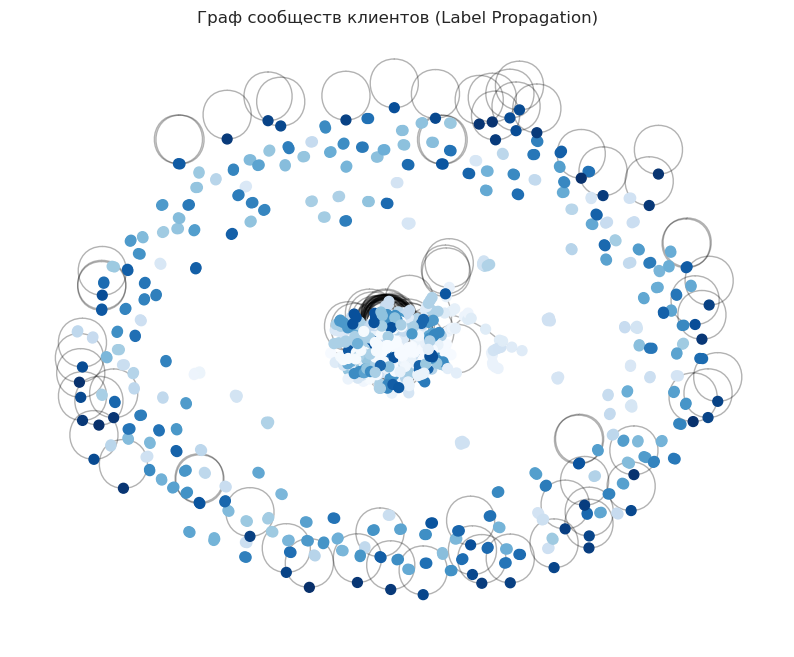

Количество сообществ: 407
Топ-5 размеров сообществ: [57, 41, 39, 28, 19]


In [38]:
# Ячейка 1: Визуализация графа сообществ
import networkx as nx
import matplotlib.pyplot as plt

# Предположим, что граф G уже создан (из ячейки 8 или 13)
# Если граф ещё не создан, используем код из ячейки 8 для его создания
G = nx.Graph()
G.add_edges_from(edges)  # edges определены в ячейке 8

# Кластеризация с Label Propagation
from networkx.algorithms.community import label_propagation_communities
communities = list(label_propagation_communities(G))

# Присваиваем цвета для каждого сообщества
colors = [i for i in range(len(communities))]
node_colors = []
for node in G.nodes():
    for i, comm in enumerate(communities):
        if node in comm:
            node_colors.append(colors[i])
            break

# Визуализация графа
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Расположение узлов
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Граф сообществ клиентов (Label Propagation)")
plt.axis('off')
plt.show()

# Статистика сообществ
community_sizes = [len(c) for c in communities]
print(f"Количество сообществ: {len(communities)}")
print(f"Топ-5 размеров сообществ: {sorted(community_sizes, reverse=True)[:5]}")

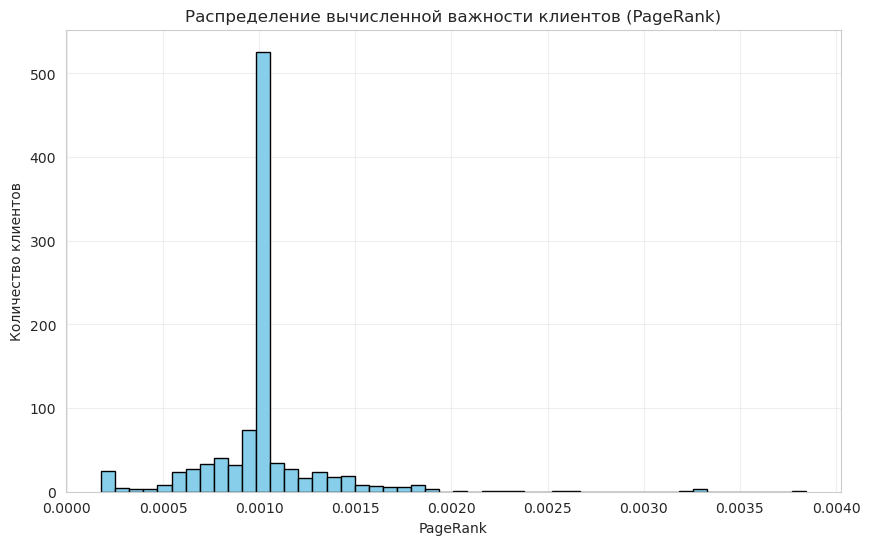

Средний PageRank: 0.0010
Максимальный PageRank: 0.0038


In [39]:
# Ячейка 2: Гистограмма распределения PageRank
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Вычисляем PageRank
pagerank = nx.pagerank(G, weight='weight')

# Преобразуем в DataFrame для удобства
pagerank_df = pd.DataFrame(list(pagerank.items()), columns=['client_id', 'pagerank'])

# Визуализация
plt.figure(figsize=(10, 6))
plt.hist(pagerank_df['pagerank'], bins=50, color='skyblue', edgecolor='black')
plt.title("Распределение вычисленной важности клиентов (PageRank)")
plt.xlabel("PageRank")
plt.ylabel("Количество клиентов")
plt.grid(True, alpha=0.3)
plt.show()

# Статистика
print(f"Средний PageRank: {pagerank_df['pagerank'].mean():.4f}")
print(f"Максимальный PageRank: {pagerank_df['pagerank'].max():.4f}")


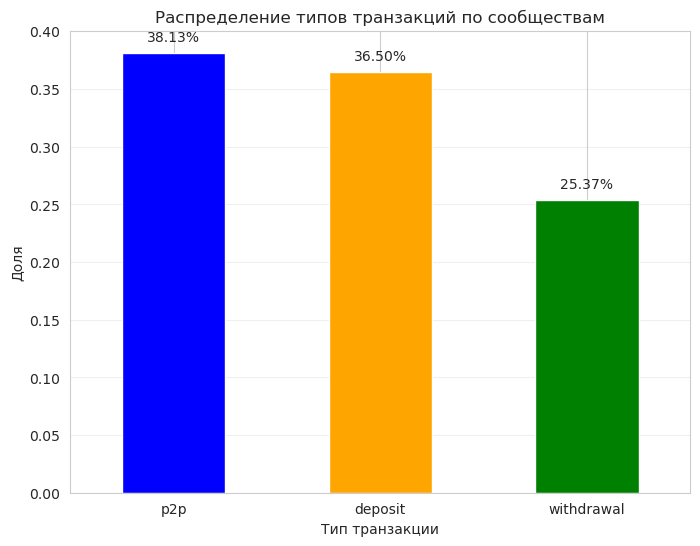

Доли типов транзакций:
p2p: 38.13%
deposit: 36.50%
withdrawal: 25.37%


In [40]:
# Ячейка 3: Диаграмма доли типов транзакций
import matplotlib.pyplot as plt

# Используем данные из ячейки 4
transaction_type_counts = transactions['transaction_type'].value_counts()
total = len(transactions)
proportions = transaction_type_counts / total

# Визуализация
plt.figure(figsize=(8, 6))
proportions.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Распределение типов транзакций по сообществам")
plt.xlabel("Тип транзакции")
plt.ylabel("Доля")
plt.xticks(rotation=0)
for i, v in enumerate(proportions):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# Статистика
print("Доли типов транзакций:")
for ttype, count in transaction_type_counts.items():
    print(f"{ttype}: {count / total:.2%}")

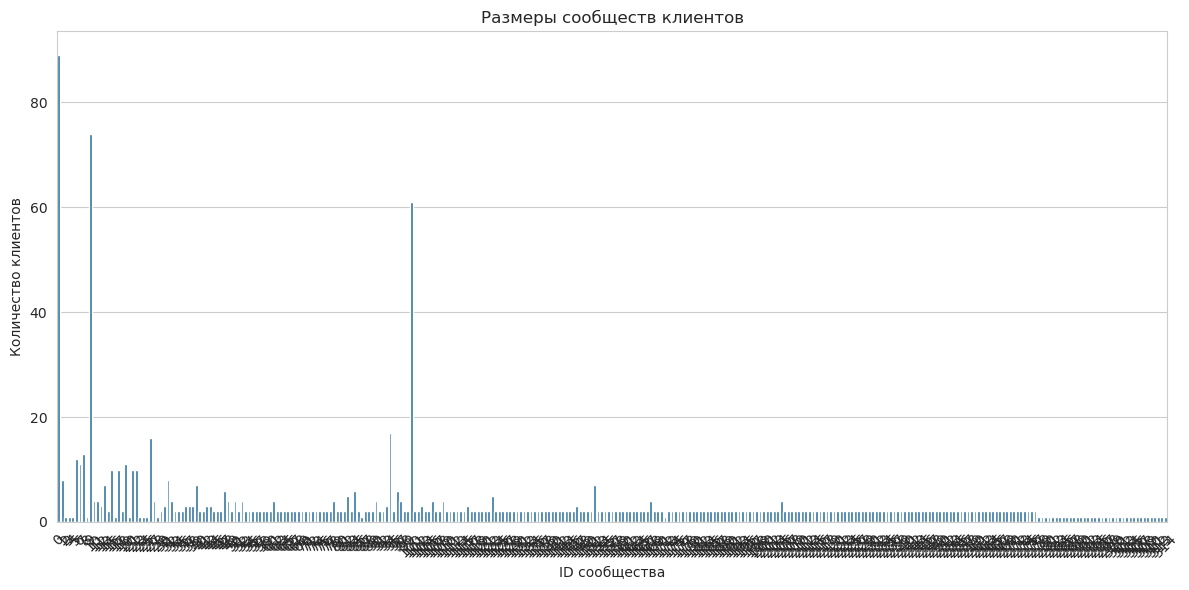

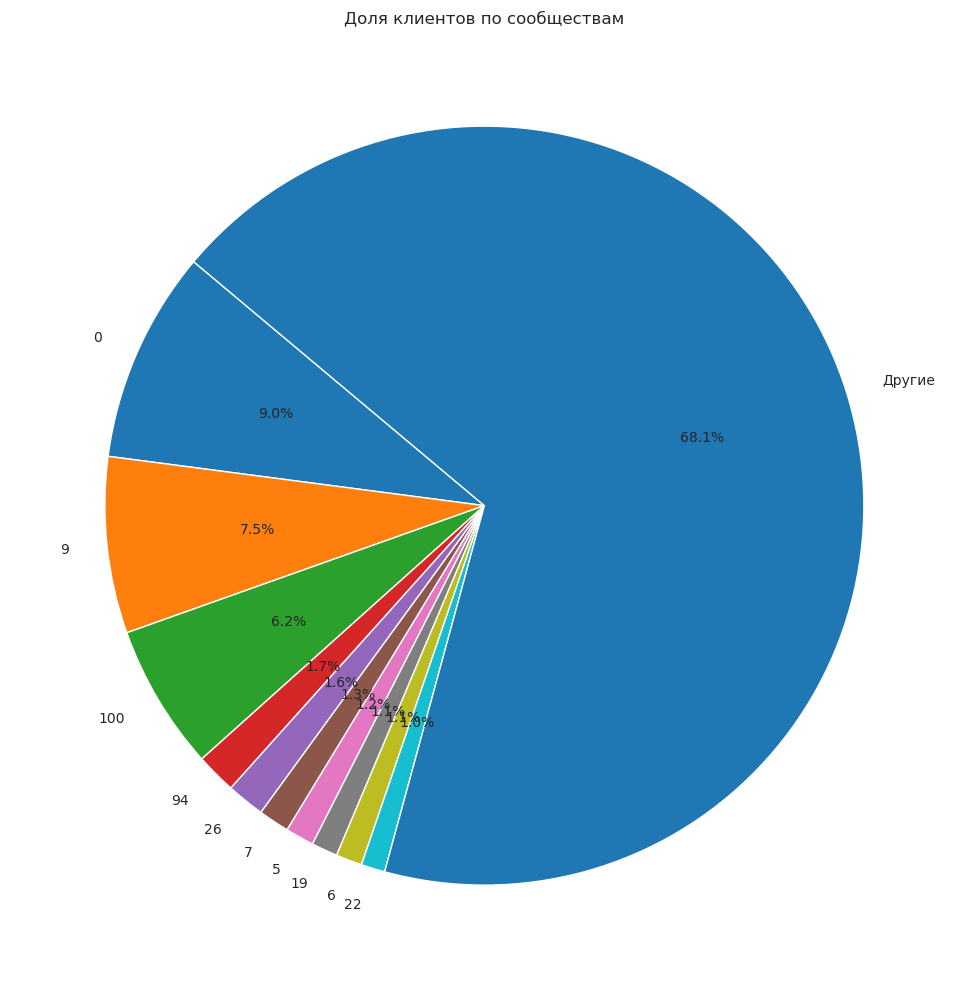


Топ-5 сообществ по размеру:
   community_id  size
0             0    89
1             9    74
2           100    61
3            94    17
4            26    16

Доля крупнейшего сообщества: 9.04%


In [45]:
# Новая ячейка 1: Гистограмма размеров сообществ и круговая диаграмма
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Используем результаты Louvain из ячейки 3 первого ноутбука
partition = community_louvain.best_partition(G, weight='weight')
community_sizes = pd.Series(partition).value_counts().reset_index()
community_sizes.columns = ['community_id', 'size']
community_sizes = community_sizes.sort_values('size', ascending=False)

# Гистограмма размеров сообществ
plt.figure(figsize=(12, 6))
sns.barplot(x='community_id', y='size', data=community_sizes)
plt.title('Размеры сообществ клиентов')
plt.xlabel('ID сообщества')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('community_sizes.png')
plt.show()

# Круговая диаграмма для доли клиентов (топ-10 + "Другие")
top_communities = community_sizes.head(10)
other_size = community_sizes['size'][10:].sum() if len(community_sizes) > 10 else 0
if other_size > 0:
    other_row = pd.DataFrame({'community_id': ['Другие'], 'size': [other_size]})
    top_communities = pd.concat([top_communities, other_row], ignore_index=True)

plt.figure(figsize=(10, 10))
plt.pie(top_communities['size'], labels=top_communities['community_id'], autopct='%1.1f%%', startangle=140)
plt.title('Доля клиентов по сообществам')
plt.tight_layout()
plt.savefig('community_sizes_pie.png')
plt.show()

print("\nТоп-5 сообществ по размеру:")
print(community_sizes.head(5))
print(f"\nДоля крупнейшего сообщества: {community_sizes['size'].iloc[0] / community_sizes['size'].sum() * 100:.2f}%")

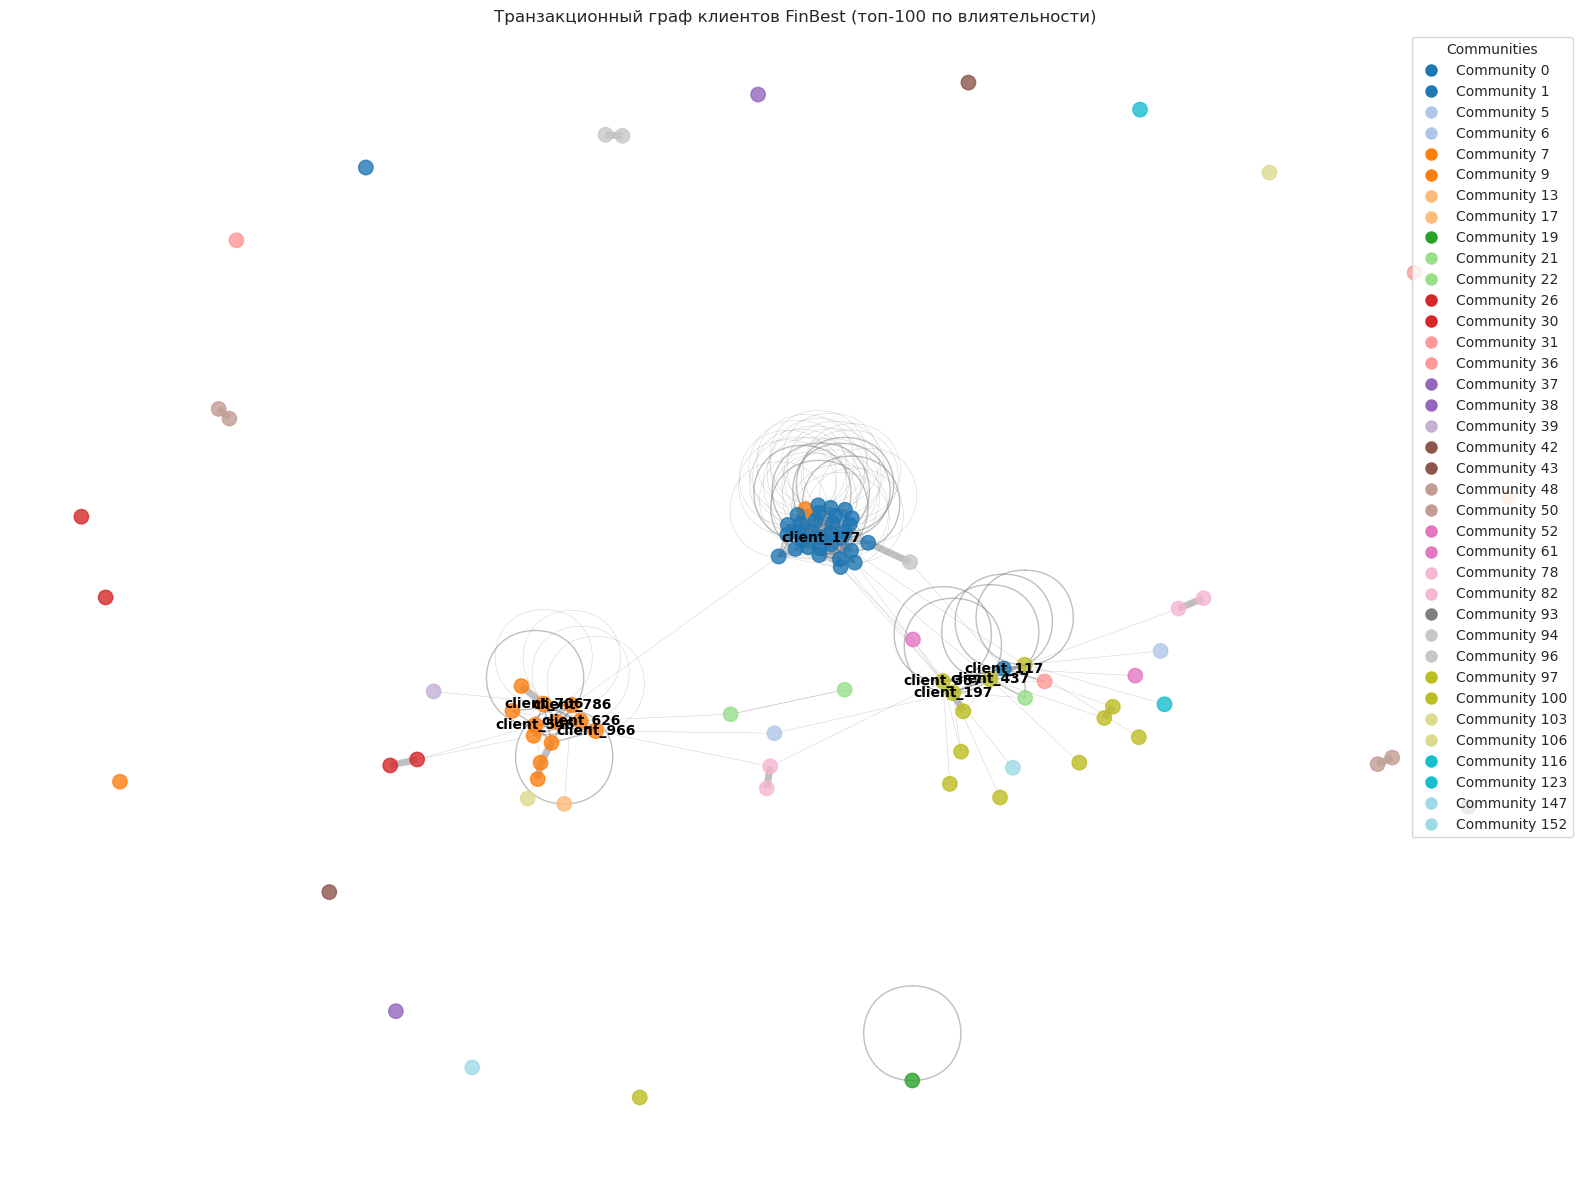

In [46]:
# Новая ячейка 2: Визуализация графа для топ-100 клиентов по влиятельности
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Вычисляем PageRank для графа G
pagerank_scores = nx.pagerank(G, weight='weight')

# Создаём DataFrame с сообществами и PageRank
client_communities = pd.DataFrame(list(partition.items()), columns=['client_id', 'community_id'])
client_communities['influence_score'] = client_communities['client_id'].map(pagerank_scores)
client_communities['community_size'] = client_communities['community_id'].map(
    community_sizes.set_index('community_id')['size']
)

# Выбираем топ-100 клиентов по влиятельности
top_clients = client_communities.sort_values('influence_score', ascending=False).head(100)
top_client_ids = set(top_clients['client_id'])

# Создаём подграф для топ-100 клиентов
G_top = nx.Graph()
for _, row in top_clients.iterrows():
    G_top.add_node(row['client_id'], 
                   community=row['community_id'], 
                   influence=row['influence_score'],
                   community_size=row['community_size'])

for u, v, data in G.edges(data=True):
    if u in top_client_ids and v in top_client_ids:
        G_top.add_edge(u, v, weight=data.get('weight', 1.0), relationship=data.get('layer', 'shared'))

# Визуализация графа
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G_top, k=0.15, iterations=50, seed=42)

# Цвета узлов по сообществам
communities = sorted(set(nx.get_node_attributes(G_top, 'community').values()))
cmap = plt.cm.get_cmap('tab20', len(communities))
community_colors = {comm: cmap(i) for i, comm in enumerate(communities)}

# Размер узлов пропорционален влиятельности
node_sizes = [100 + 5000 * G_top.nodes[node]['influence'] for node in G_top.nodes]
node_colors = [community_colors[G_top.nodes[node]['community']] for node in G_top.nodes]

# Рисуем узлы и рёбра
nx.draw_networkx_nodes(G_top, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
edge_weights = [G_top[u][v]['weight'] for u, v in G_top.edges()]
nx.draw_networkx_edges(G_top, pos, width=[w*0.5 for w in edge_weights], alpha=0.5, edge_color='grey')

# Метки для топ-10 влиятельных клиентов
top_influencers = sorted(G_top.nodes, key=lambda x: G_top.nodes[x]['influence'], reverse=True)[:10]
labels = {node: node for node in top_influencers}
nx.draw_networkx_labels(G_top, pos, labels=labels, font_size=10, font_weight='bold')

# Легенда для сообществ
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor=community_colors[comm], 
                          markersize=10, label=f'Community {comm}') 
                   for comm in communities]
plt.legend(handles=legend_elements, title='Communities', loc='upper right')

plt.title('Транзакционный граф клиентов FinBest (топ-100 по влиятельности)')
plt.axis('off')
plt.tight_layout()
plt.savefig('client_graph.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
# Новая ячейка 3: Анализ транзакций по сообществам
import matplotlib.pyplot as plt
import seaborn as sns

# Объединяем данные о транзакциях с сообществами
tx_with_communities = transactions.merge(
    client_communities[['client_id', 'community_id', 'influence_score']], 
    on='client_id', 
    how='left',
    suffixes=('_tx', '_comm')
)

# Анализируем средние суммы транзакций по сообществам
community_amounts = tx_with_communities.groupby('community_id_comm')['amount'].agg(
    ['mean', 'median', 'min', 'max', 'count']
).reset_index()

# Визуализация
plt.figure(figsize=(14, 6))
sns.barplot(x='community_id_comm', y='mean', data=community_amounts)
plt.title('Средняя сумма транзакции по сообществам')
plt.xlabel('ID сообщества')
plt.ylabel('Средняя сумма')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('community_amounts.png')
plt.show()

# Выводим статистику
print("Статистика по суммам транзакций в сообществах:")
display(community_amounts.sort_values('count', ascending=False))

KeyError: 'community_id_comm'